In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime


In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [4]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-04-23,3375.000000,3308.500000,3319.100098,3340.879883,3192800.0,3340.879883,AMAZON
2021-04-26,3428.449951,3330.939941,3348.000000,3409.000000,4880700.0,3409.000000,AMAZON
2021-04-27,3460.000000,3398.010010,3443.469971,3417.429932,3827100.0,3417.429932,AMAZON
2021-04-28,3489.879883,3425.000000,3434.800049,3458.500000,4631900.0,3458.500000,AMAZON
2021-04-29,3514.449951,3435.000000,3505.100098,3471.310059,7682400.0,3471.310059,AMAZON
2021-04-30,3554.000000,3462.500000,3525.120117,3467.419922,7001800.0,3467.419922,AMAZON
2021-05-03,3486.649902,3372.699951,3484.729980,3386.489990,5875500.0,3386.489990,AMAZON
2021-05-04,3367.979980,3272.129883,3356.189941,3311.870117,5439400.0,3311.870117,AMAZON
2021-05-05,3354.699951,3264.360107,3338.860107,3270.540039,3701700.0,3270.540039,AMAZON


In [5]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,116.223439,113.185131,114.803745,114.740860,1.297611e+08,114.484628
std,17.726423,17.236629,17.631079,17.444444,5.235245e+07,17.567980
min,75.809998,74.717499,75.087502,75.157501,4.669130e+07,74.579391
25%,110.392502,106.089996,108.199997,108.220001,9.126650e+07,107.872421
50%,120.669998,117.570000,119.440002,119.209999,1.144594e+08,119.032127
75%,129.690002,126.559998,128.360001,127.879997,1.545153e+08,127.849998
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.946396


In [6]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-05-06 to 2021-05-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          253 non-null    float64
 1   Low           253 non-null    float64
 2   Open          253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    float64
 5   Adj Close     253 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


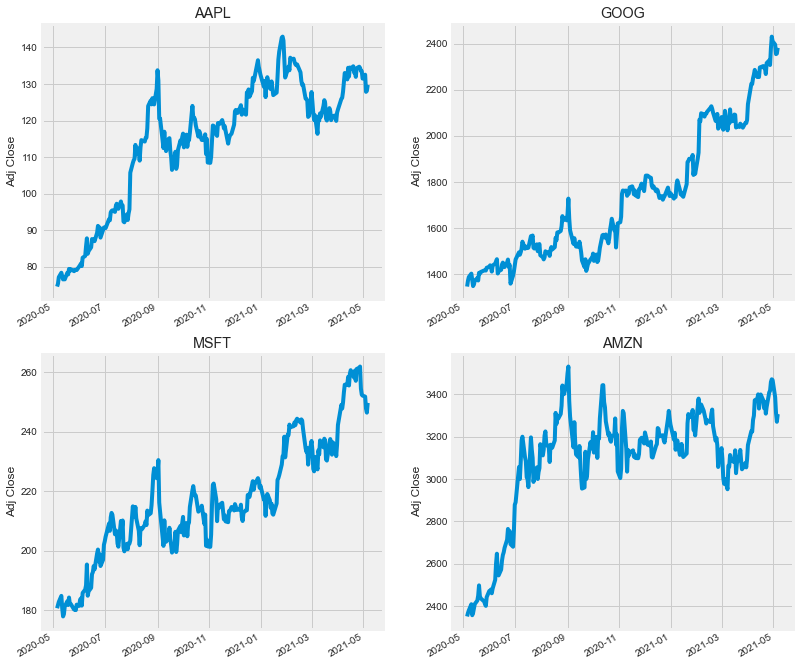

In [7]:
# Historical view of closing price

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

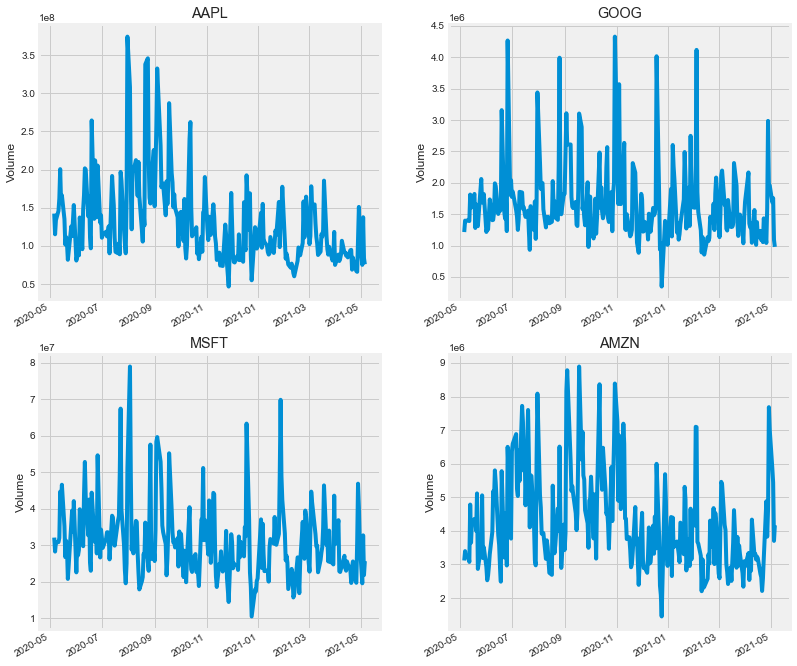

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

Moving average of various stocks?

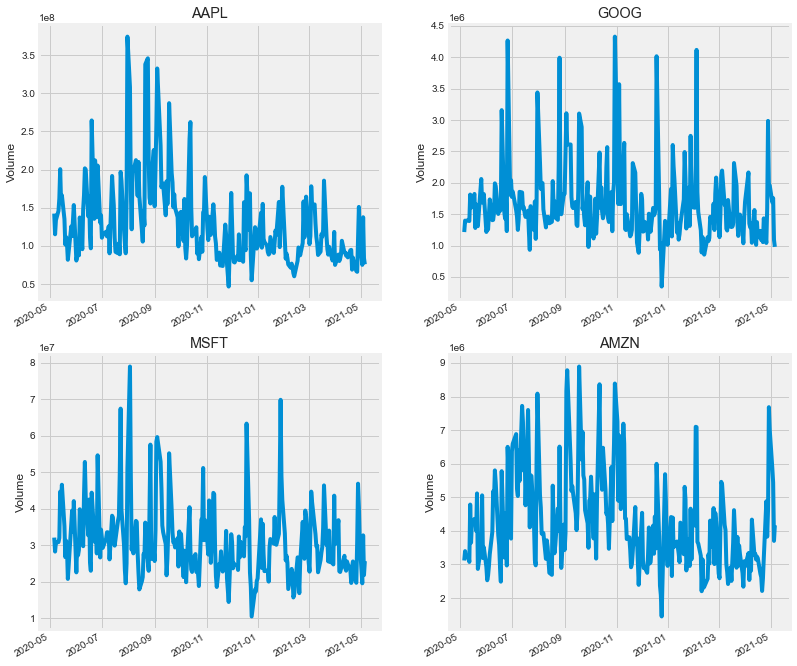

In [9]:

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

In [10]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name'], dtype='object')


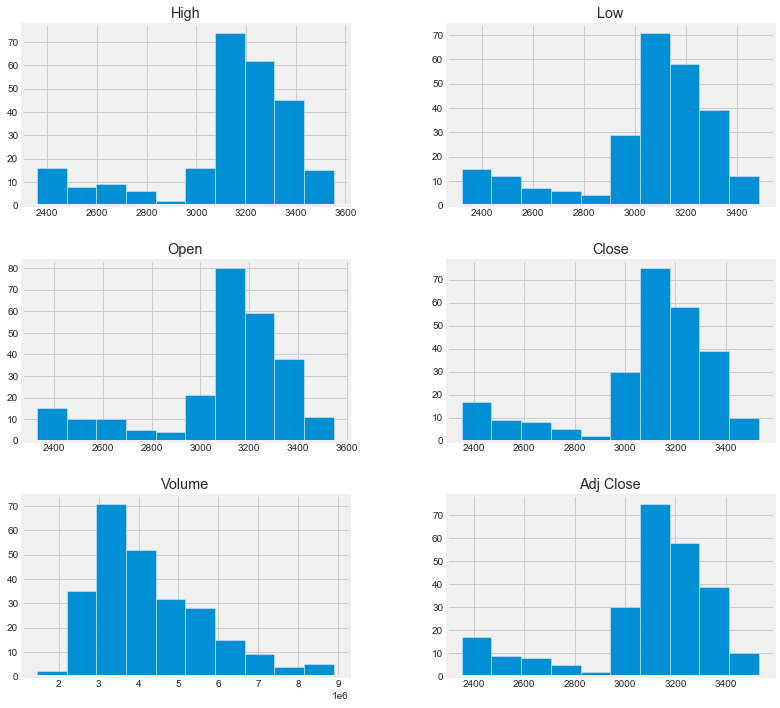

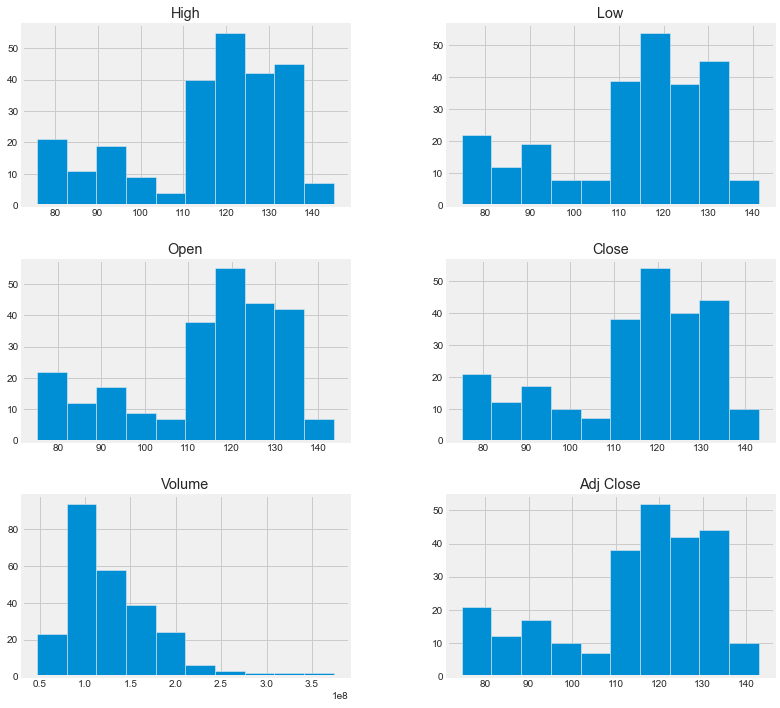

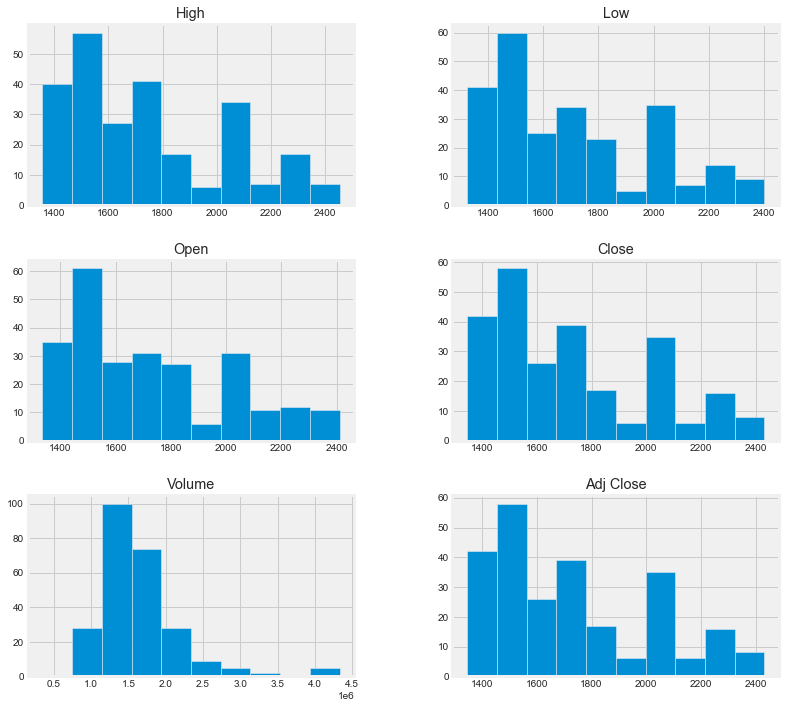

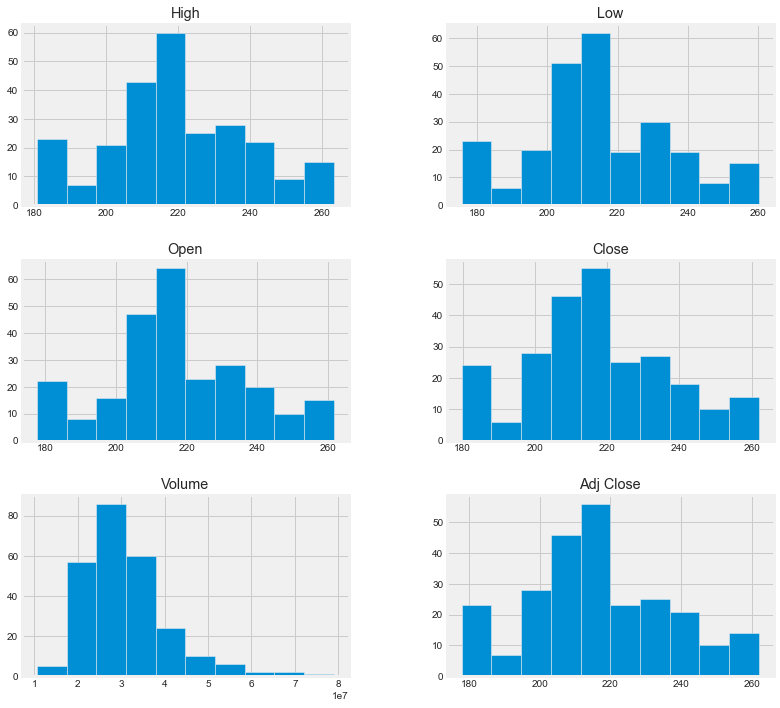

In [11]:
df.groupby("company_name").hist(figsize=(12, 12));

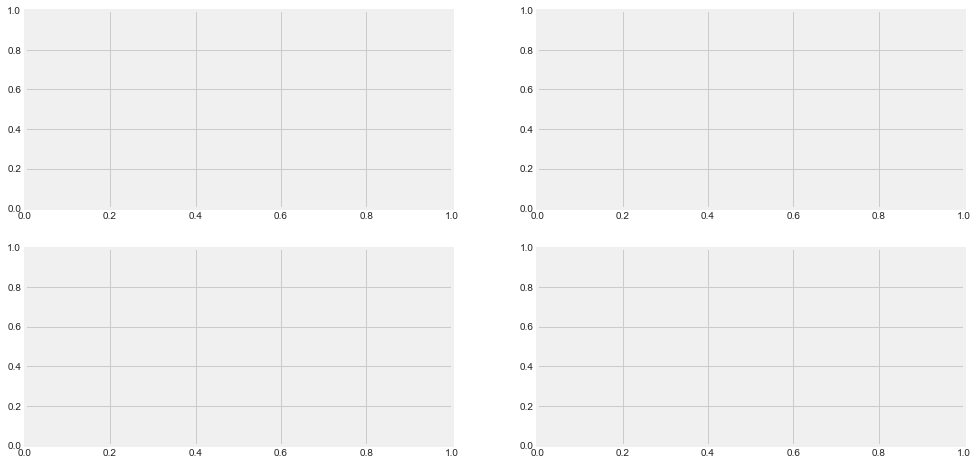

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

Daily return of the stock on average?

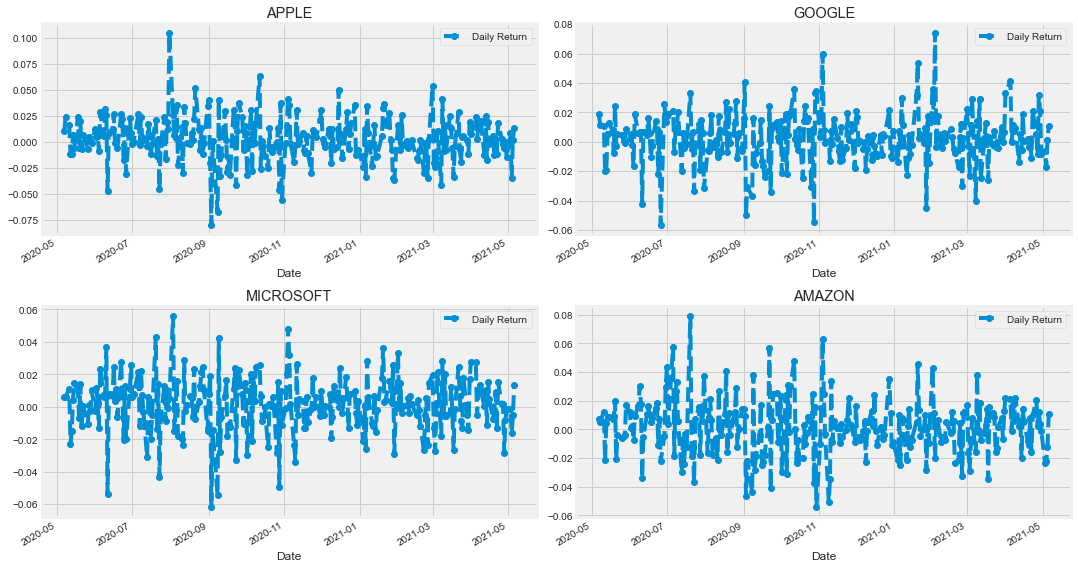

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

<AxesSubplot:>

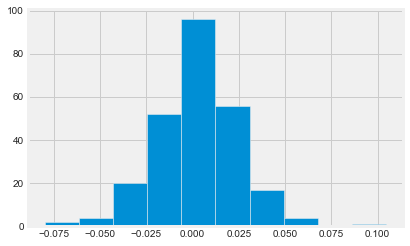

In [15]:
AAPL['Daily Return'].hist()

Correlation between different stocks?


In [16]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']


In [17]:
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-06,74.579391,1347.300049,180.703674,2351.260010
2020-05-07,75.350914,1372.560059,181.753021,2367.610107
2020-05-08,77.144394,1388.369995,182.822144,2379.610107
2020-05-11,78.358284,1403.260010,184.861435,2409.000000
2020-05-12,77.462791,1375.739990,180.673965,2356.949951


In [18]:
tech_rets = closing_df.pct_change()
tech_rets.head()


Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-06,NaN,NaN,NaN,NaN
2020-05-07,0.010345,0.018749,0.005807,0.006954
2020-05-08,0.023802,0.011519,0.005882,0.005068
2020-05-11,0.015735,0.010725,0.011155,0.012351
2020-05-12,-0.011428,-0.019611,-0.022652,-0.021606


C:\Users\kshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


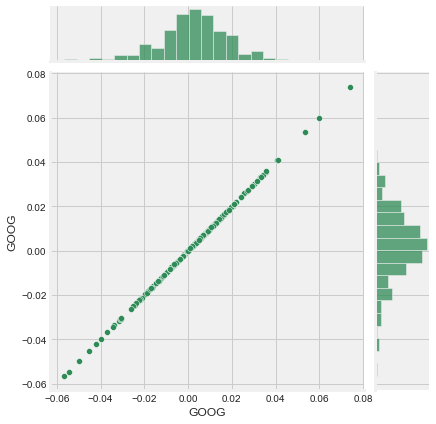

In [19]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

C:\Users\kshan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


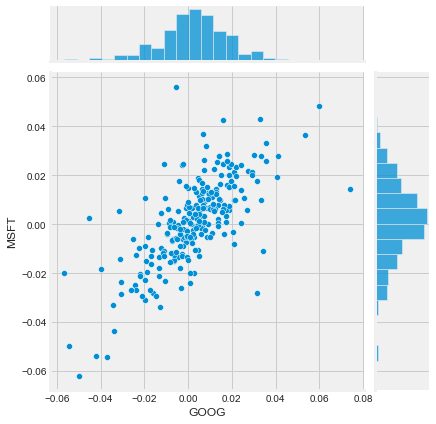

In [20]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

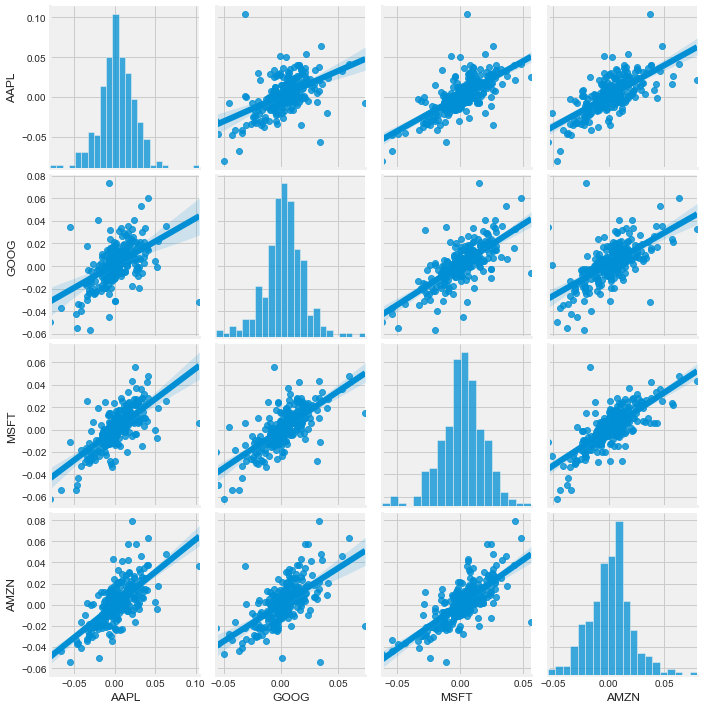

In [21]:

sns.pairplot(tech_rets, kind='reg')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

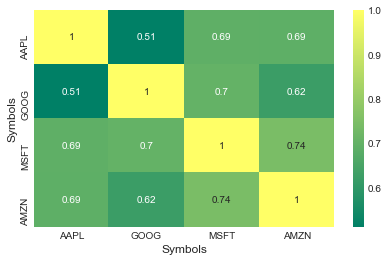

In [22]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

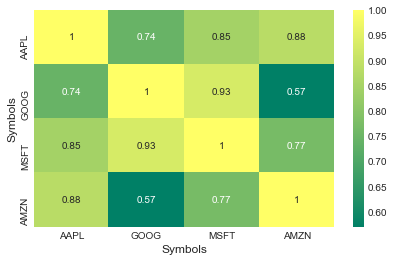

In [23]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

How much value do we put at risk by investing in a particular stock?

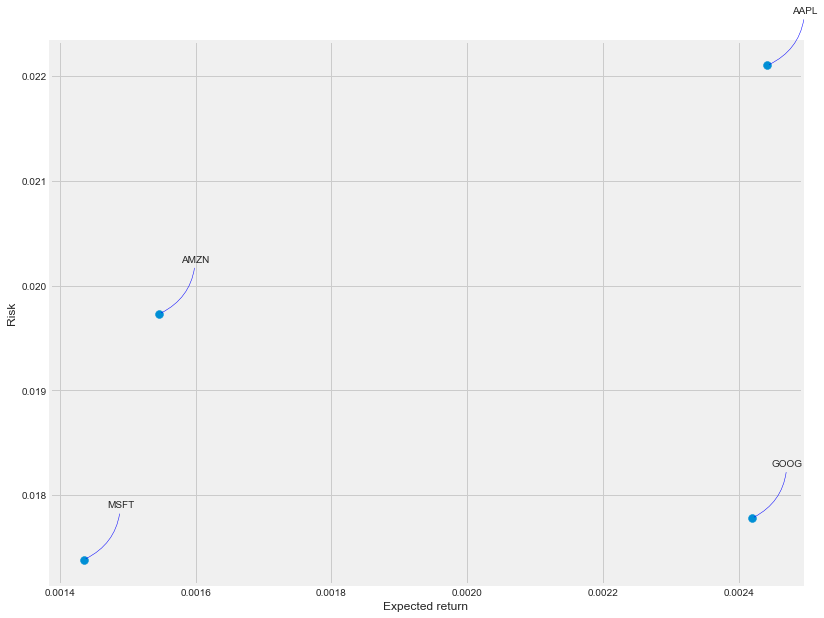

In [24]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Predicting the closing price stock price of APPLE inc:


In [25]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2021-04-30,133.559998,131.070007,131.779999,131.460007,109713200.0,131.460007
2021-05-03,134.070007,131.830002,132.039993,132.539993,75135100.0,132.539993
2021-05-04,131.490005,126.699997,131.190002,127.849998,137564700.0,127.849998


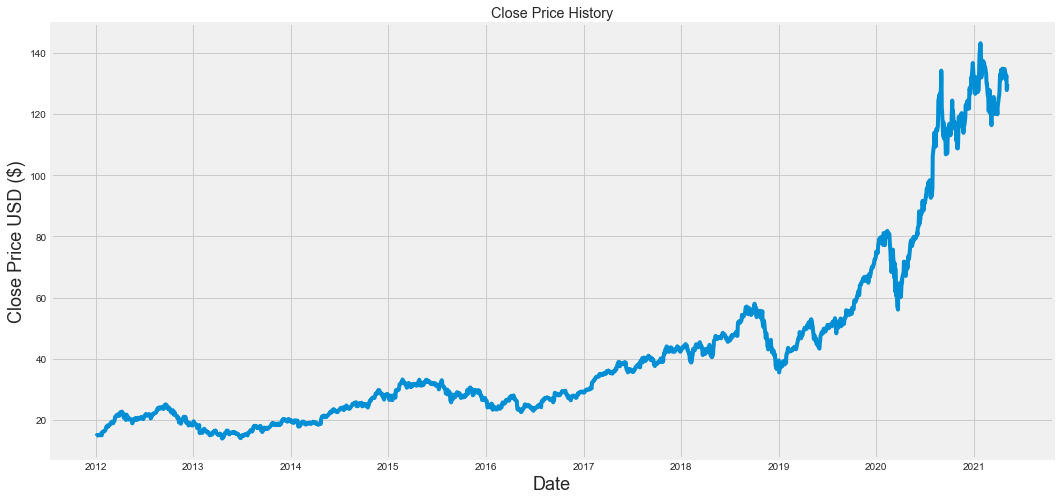

In [26]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [27]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2234

In [28]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.88151297],
       [0.88344783],
       [0.8961401 ]])

In [29]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2174/2174 [==============================] - 36s 15ms/step - loss: 0.0016


In [33]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


6.8204657160590125

<ipython-input-34-c4aee32f125a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


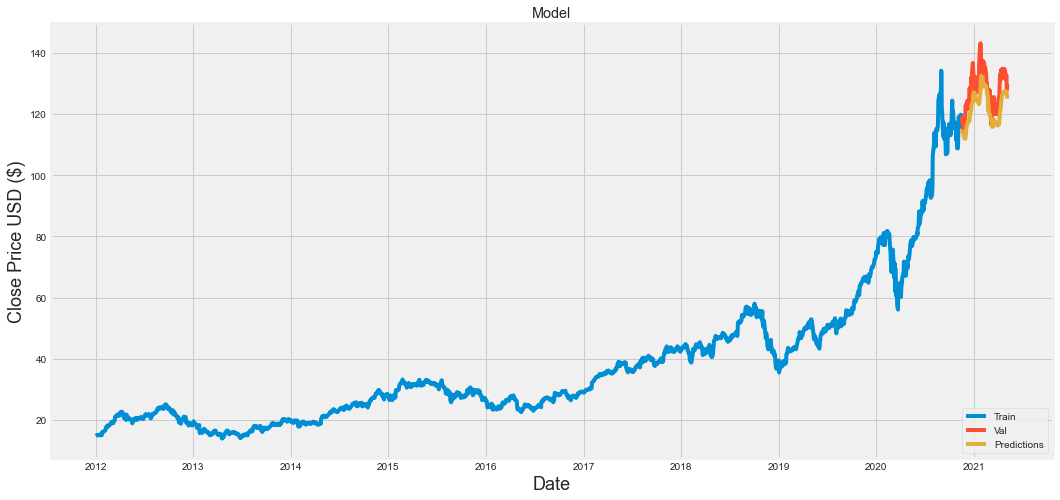

In [34]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()